In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# READING DATA

In [2]:
train_data=pd.read_csv('bigdatamart_train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

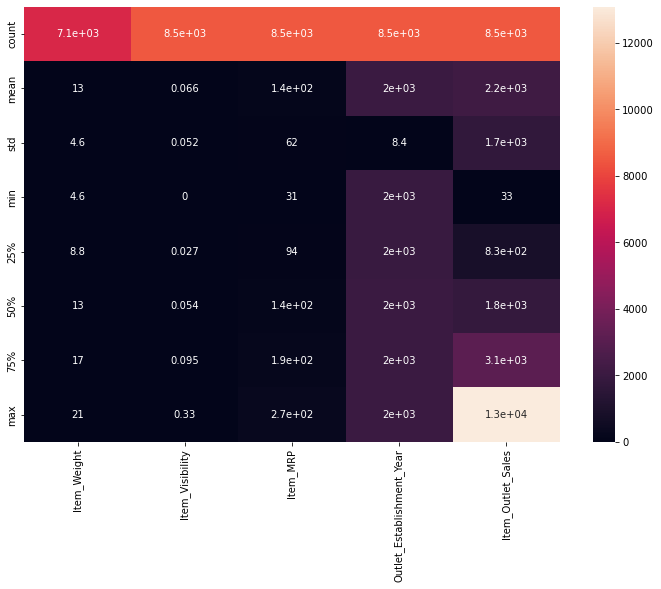

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.describe(),annot=True)

STD FOR SALES IS HIGH,OUTLET SIZE,TYPE SEEMS TO B NORMALLY DISTRIBUTED WITH SOME OUTLIERS

In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

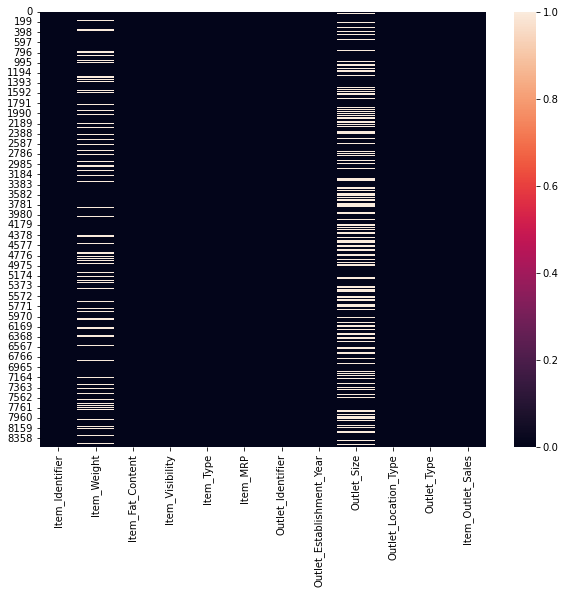

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.isnull())

In [9]:
train_data.value_counts('Outlet_Size')

Outlet_Size
Medium    2793
Small     2388
High       932
dtype: int64

FILLING NULL VALUES

In [10]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

In [11]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
train_data.value_counts('Item_Weight')

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
5.735      2
6.520      1
5.400      1
7.685      1
9.420      1
Length: 415, dtype: int64

In [14]:
np.mean(train_data['Item_Weight'])

12.857645184136183

In [15]:
np.median(train_data['Item_Weight'])

nan

In [16]:
np.max(train_data['Item_Weight'])

21.35

In [17]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(np.mean(train_data['Item_Weight']))

<AxesSubplot:>

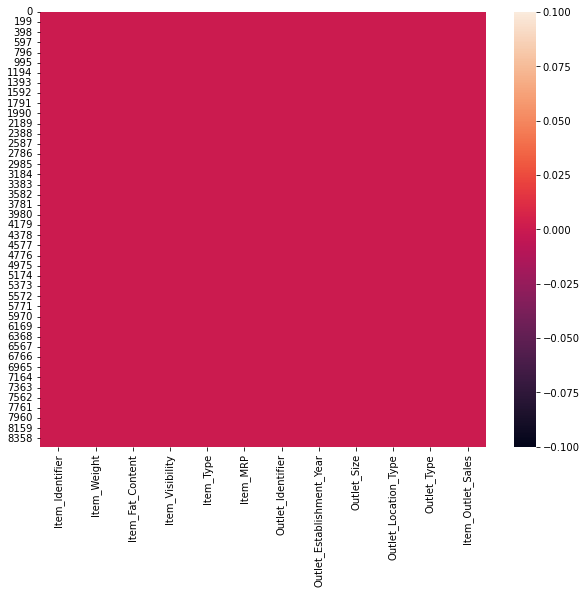

In [18]:
plt.figure(figsize=(10,8))

sns.heatmap(train_data.isnull())

NULL VALUES ARE REPLACED

# EDA

In [19]:
train_data.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

AS THERE IS MULTIPLE DATA WITH SAME MEANNG MERGING THEM INTO SINGLE VARIABLE

In [20]:
train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].replace('LF','Low Fat')
train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].replace('low fat','Low Fat')
train_data["Item_Fat_Content"]=train_data["Item_Fat_Content"].replace('reg','Regular')

In [21]:
train_data.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

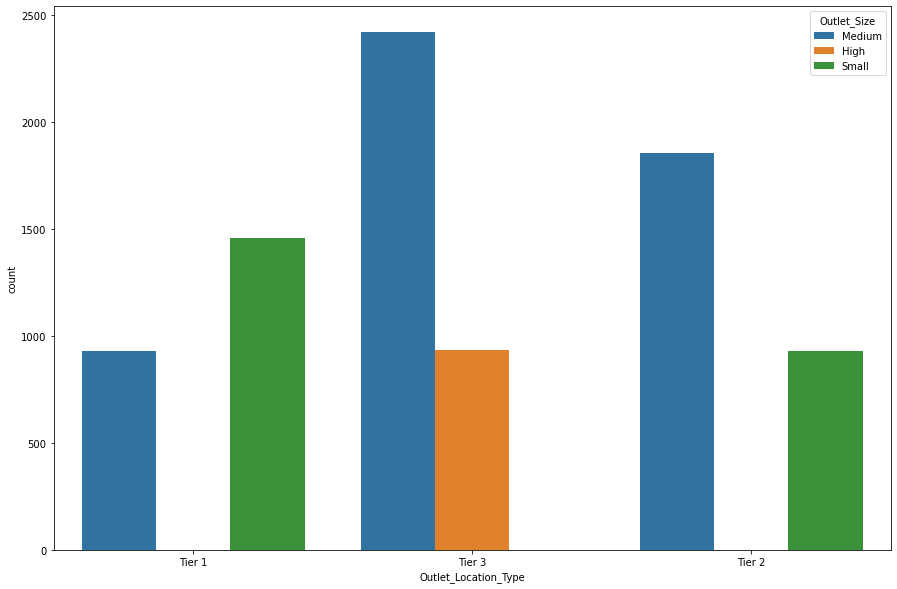

In [22]:
plt.figure(figsize=(15,10))

sns.countplot(data=train_data,x='Outlet_Location_Type',hue='Outlet_Size')


TIER 1 AND TIER 2 DONT HAVE ANY HIGH/LARGE STORES

TIER 3 DONT HAVE SMALL STORES

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

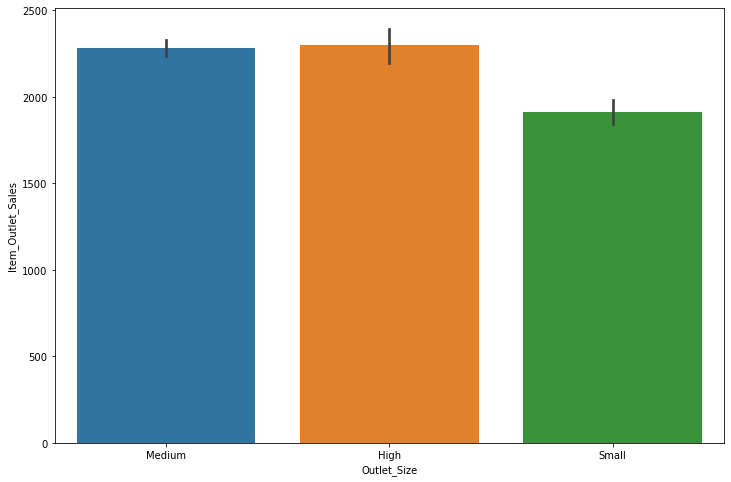

In [23]:
plt.figure(figsize=(12,8))

sns.barplot(data=train_data,x='Outlet_Size',y='Item_Outlet_Sales')

SALES FROM HIGH AND MEDIUM STORES ARE ALMOST SAME

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

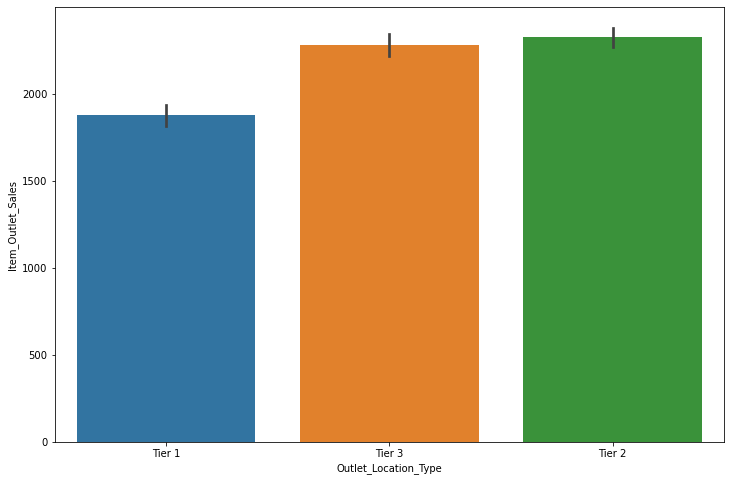

In [24]:
plt.figure(figsize=(12,8))

sns.barplot(data=train_data,x='Outlet_Location_Type',y='Item_Outlet_Sales')

TIER 2 AND TIER 3 ARE HAVING ALMOST EQUAL BUSINESS

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

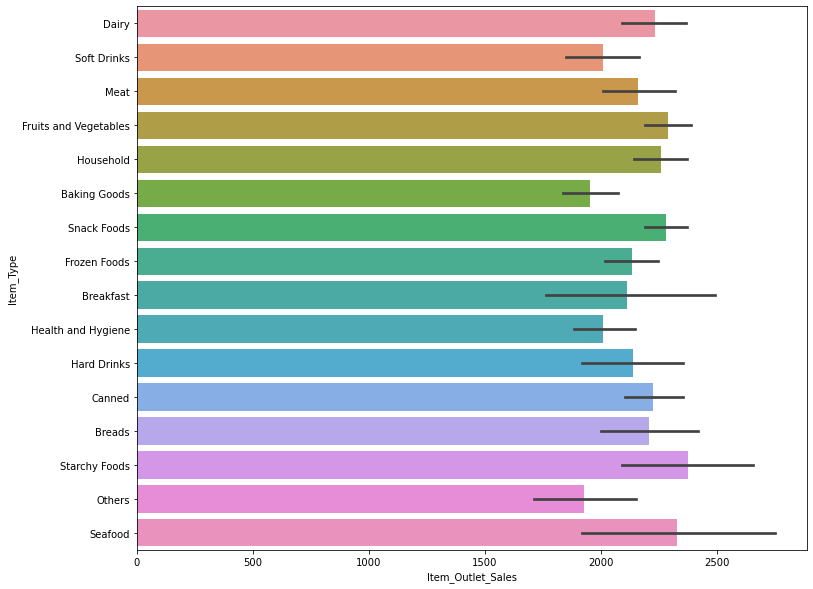

In [25]:
plt.figure(figsize=(12,10))
sns.barplot(data=train_data,x='Item_Outlet_Sales',y='Item_Type')

ALMOST EVERY PRODUCT HAVE EQUAL SALES



Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

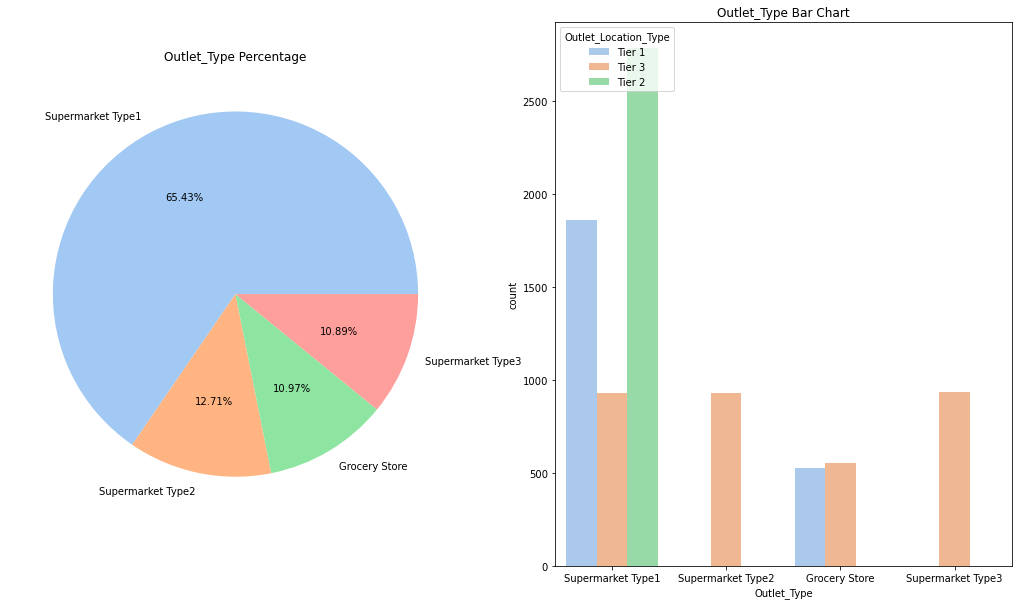

In [26]:
colors=sns.color_palette('pastel')
labels=train_data['Outlet_Type'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Type Percentage')
plt.pie(train_data['Outlet_Type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Type Bar Chart')
sns.countplot(x="Outlet_Type", data=train_data, palette=colors,hue='Outlet_Location_Type')

train_data.Outlet_Type.value_counts(dropna=False)

SUPERMARKET TYPE 1 IS DOING GOOD BUSINESS COMPARED TO OTHERS IN TIER 2 LOCATION 

65% SALES IS COMING FROM SUPERMARKET TYPE 1 

AND REST NEAR ABOUT 10%

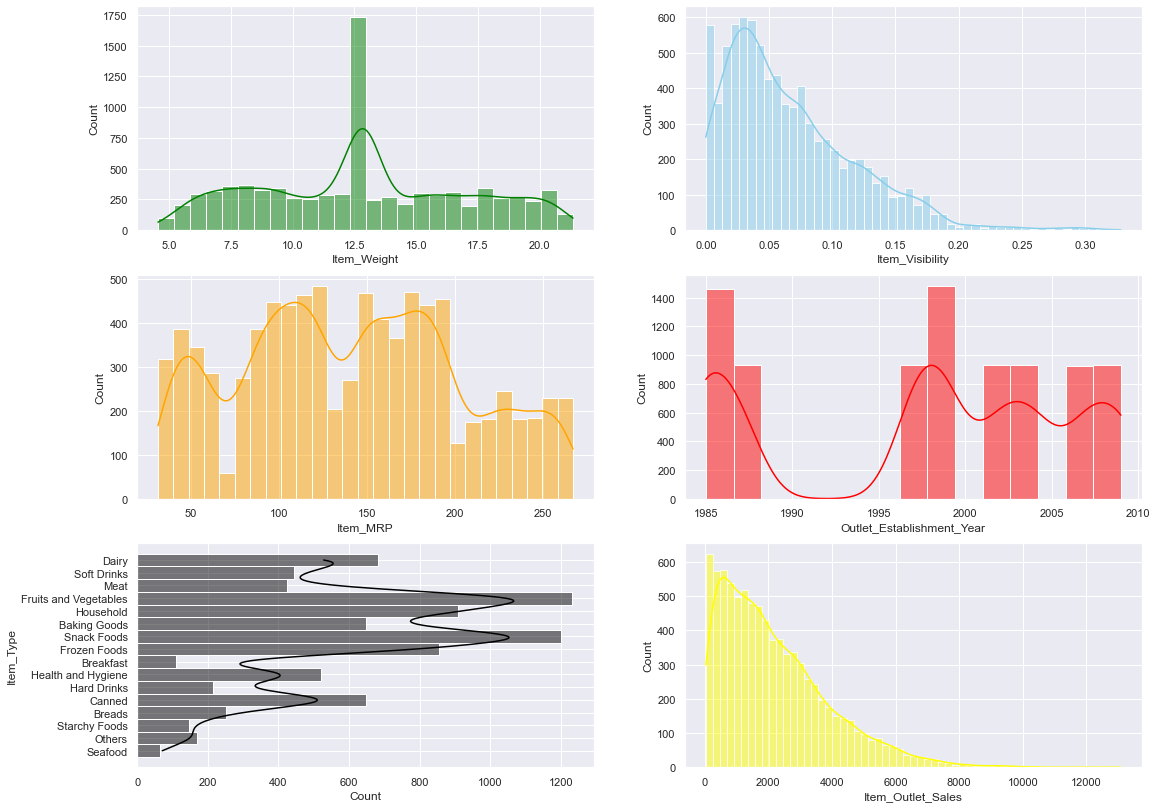

In [27]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=train_data, x="Item_Weight", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=train_data, x="Item_Visibility", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=train_data, x="Item_MRP", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=train_data, x="Outlet_Establishment_Year", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=train_data, y="Item_Type", kde=True, ax=axs[2, 0], color='black');
sns.histplot(data=train_data, x="Item_Outlet_Sales", kde=True, ax=axs[2, 1], color='yellow');

skewness present in sales,visibility

In [28]:
train_data.sort_values(by=['Item_Outlet_Sales'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500000,Low Fat,0.000000,Soft Drinks,32.8900,OUT010,1998,Medium,Tier 3,Grocery Store,33.2900
6950,NCR42,9.105000,Low Fat,0.064411,Household,33.3900,OUT010,1998,Medium,Tier 3,Grocery Store,33.2900
2571,FDU21,12.857645,Regular,0.134328,Snack Foods,35.0558,OUT019,1985,Small,Tier 1,Grocery Store,33.9558
3053,NCL41,12.857645,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,1985,Small,Tier 1,Grocery Store,34.6216
7388,FDQ47,7.155000,Regular,0.281510,Breads,33.8874,OUT010,1998,Medium,Tier 3,Grocery Store,35.2874
...,...,...,...,...,...,...,...,...,...,...,...,...
6541,FDI50,12.857645,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4349,FDP33,12.857645,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
1450,FDZ20,12.857645,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
5223,FDQ19,12.857645,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600


Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year,Outlet_Identifier are same for higher sales from samples

# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,


**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case


In [29]:
# APLLYING LABEL ENCODER TO REST AS THEY ARE ORDINAL DATA

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [30]:
train_data['Item_Fat_Content'] = LE.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size'] = LE.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = LE.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = LE.fit_transform(train_data['Outlet_Type'])
train_data['Item_Type'] = LE.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier'] = LE.fit_transform(train_data['Outlet_Identifier'])


In [31]:
train_data.value_counts('Item_Fat_Content')


Item_Fat_Content
0    5517
1    3006
dtype: int64

In [32]:
train_data.value_counts('Outlet_Size')


Outlet_Size
1    5203
2    2388
0     932
dtype: int64

In [33]:
train_data.value_counts('Outlet_Location_Type')


Outlet_Location_Type
2    3350
1    2785
0    2388
dtype: int64

In [34]:
train_data.value_counts('Outlet_Type')


Outlet_Type
1    5577
0    1083
3     935
2     928
dtype: int64

In [35]:
train_data.value_counts('Item_Type')


Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
dtype: int64

In [36]:
train_data.value_counts('Outlet_Identifier')


Outlet_Identifier
5    935
1    932
6    930
8    930
9    930
7    929
3    928
2    926
0    555
4    528
dtype: int64

In [37]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# CORRELATION

In [38]:
train_data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.201483,0.467219,1.000000,0.401522


<AxesSubplot:>

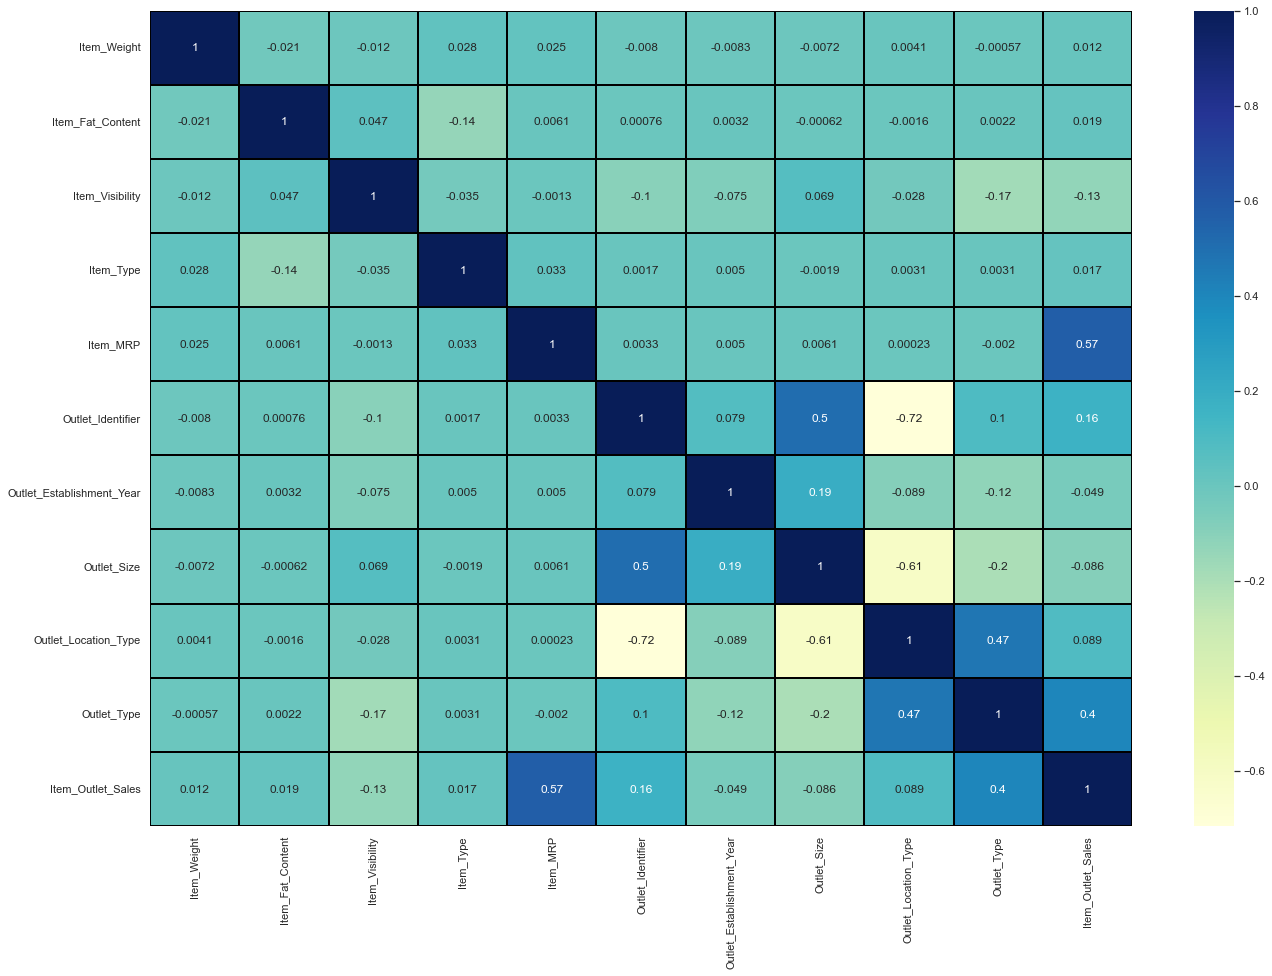

In [39]:
plt.figure(figsize=(22,15))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True,linecolor='Black',linewidths=.2)

ITEM TYPE AND ITEM WEIGHT ARE VERY LOW CORRELATED,HENCE CAN B DROPPED

In [40]:
train_data.drop(['Item_Type'],inplace=True,axis=1)
train_data.drop(['Item_Weight'],inplace=True,axis=1)
train_data.drop(['Item_Identifier'],inplace=True,axis=1)
train_data

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,249.8092,9,1999,1,0,1,3735.1380
1,1,0.019278,48.2692,3,2009,1,2,2,443.4228
2,0,0.016760,141.6180,9,1999,1,0,1,2097.2700
3,1,0.000000,182.0950,0,1998,1,2,0,732.3800
4,0,0.000000,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,214.5218,1,1987,0,2,1,2778.3834
8519,1,0.046982,108.1570,7,2002,1,1,1,549.2850
8520,0,0.035186,85.1224,6,2004,2,1,1,1193.1136
8521,1,0.145221,103.1332,3,2009,1,2,2,1845.5976


# CHECKING OUTLIERS

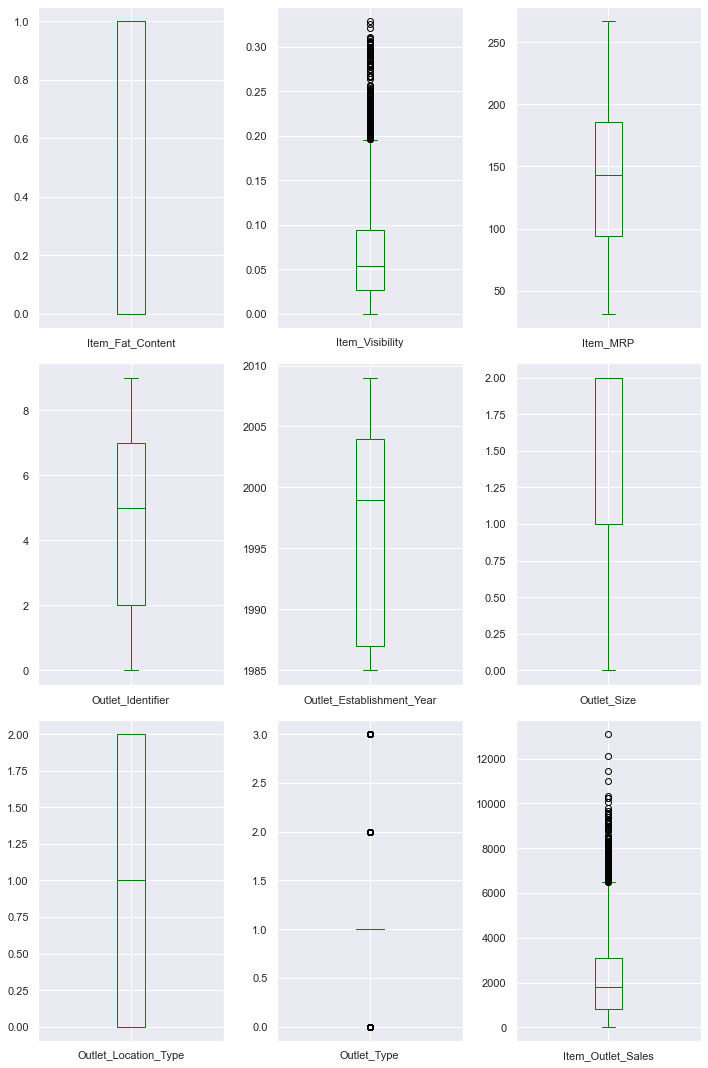

In [41]:

train_data.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS ARE PRESENT SO REMOVING IT WITH ZSCORE



# Applying Z Score 
for removing outiers

In [42]:
from scipy.stats import zscore

In [43]:
var=train_data[['Item_Visibility','Item_Outlet_Sales']]

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(var))
df1=train_data[(z<3).all(axis=1)]
df1

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,249.8092,9,1999,1,0,1,3735.1380
1,1,0.019278,48.2692,3,2009,1,2,2,443.4228
2,0,0.016760,141.6180,9,1999,1,0,1,2097.2700
3,1,0.000000,182.0950,0,1998,1,2,0,732.3800
4,0,0.000000,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,214.5218,1,1987,0,2,1,2778.3834
8519,1,0.046982,108.1570,7,2002,1,1,1,549.2850
8520,0,0.035186,85.1224,6,2004,2,1,1,1193.1136
8521,1,0.145221,103.1332,3,2009,1,2,2,1845.5976


# Percentage loss

In [45]:
loss_percent=(8523-8338)/8338*100
print(loss_percent,'%')

2.2187574958023504 %


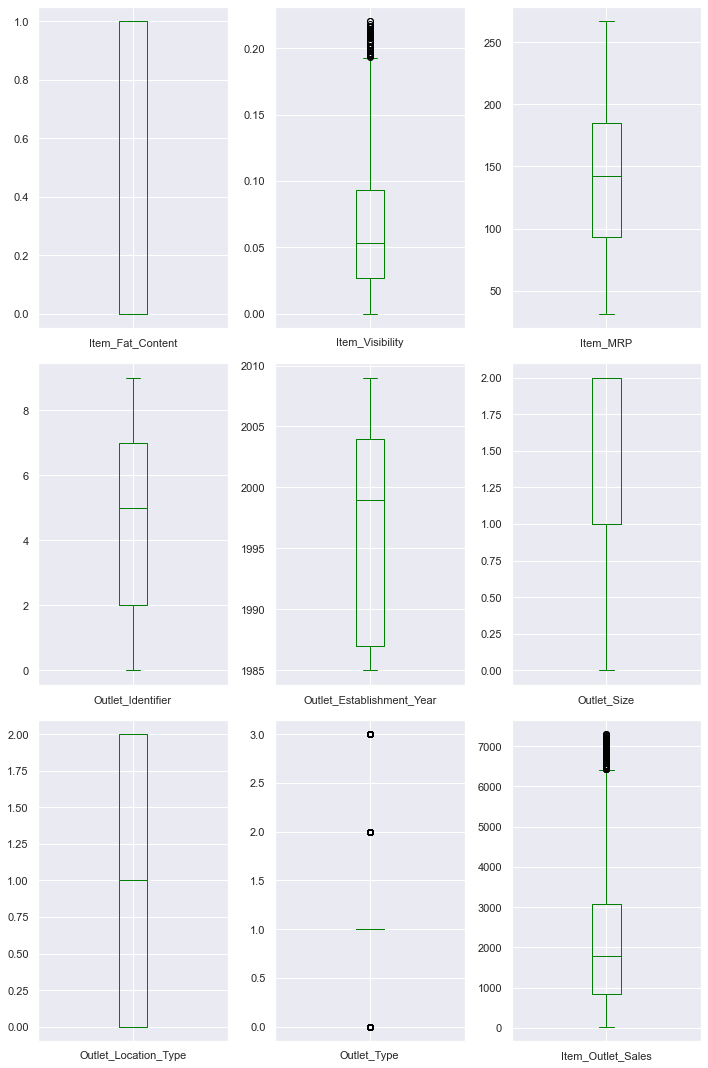

In [46]:

df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15),color = 'green')
plt.tight_layout()

NOW CAN MOVE FORWARD AS VERY LESS OUTLIERS ARE PRESENT

In [47]:
#independent column
x=df1.iloc[:,:-1]
#target
y=df1.iloc[:,-1]

In [48]:
x.shape

(8338, 8)

In [49]:
y.shape

(8338,)

# SKEWNESS CHECK

In [50]:
df1.skew()

Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

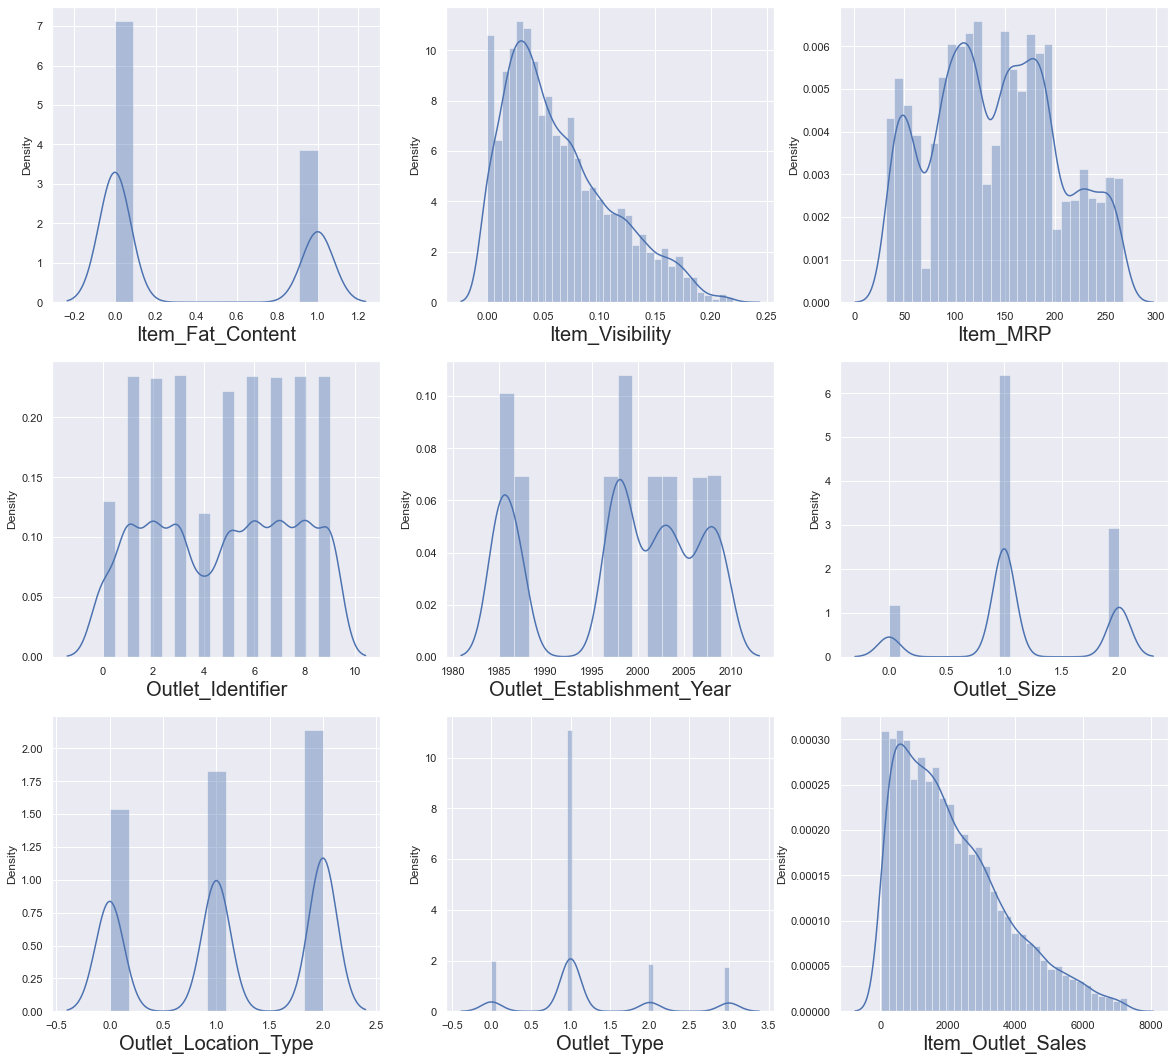

In [51]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
columns = ['Item_Fat_Content','Item_Visibility','Item_MRP',
           'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
           'Outlet_Type','Item_Outlet_Sales']
for column in columns:
    if plotnumber<=9:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

SKEWNESS PRESENT IN SALES AND VISIBILITY

# Removing skewness

In [52]:
from sklearn.preprocessing import power_transform

df1['Item_Visibility']=power_transform(x,method='yeo-johnson')
df1['Item_Visibility'].head()

0   -0.736645
1    1.357506
2   -0.736645
3    1.357506
4   -0.736645
Name: Item_Visibility, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.73664489, -1.0115072 ,  1.77183095, ..., -0.27887393,
        -1.37034498, -0.25983859],
       [ 1.35750619, -0.94331963, -1.48293919, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.73664489, -0.9964643 ,  0.02459721, ..., -0.27887393,
        -1.37034498, -0.25983859],
       ...,
       [-0.73664489, -0.60758452, -0.88777846, ...,  1.38320672,
        -0.13564253, -0.25983859],
       [ 1.35750619,  1.71466062, -0.59691305, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.73664489, -0.40303734, -1.04370833, ...,  1.38320672,
        -1.37034498, -0.25983859]])



# Splitting the DataFrame

train test split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [55]:
x_train.shape

(6503, 8)

In [56]:
x_test.shape

(1835, 8)

In [57]:
y_train.shape

(6503,)

In [59]:
y_test.shape

(1835,)

# Building model

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred_lr))

Score:  0.4985349791879534
r2 score:  0.5008980015648692


In [62]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))

Score:  1.0
r2 score:  0.17123181272863996


In [63]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.9357132462130398
r2 score:  0.5501260232062606


In [64]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

Score:  0.08779954784047128
r2 score:  0.10465719436470478


In [65]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.4985287175424181
r2 score:  0.5007354256480118


# Hyper parameter tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [109]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [110]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations


rf_random = RandomizedSearchCV(estimator = fr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [111]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
rf_random.best_params_


{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [113]:
prediction = rf_random.predict(x_test)


# Now using the above parameters which are found to be best

In [114]:
mod1= RandomForestRegressor(n_estimators=300,min_samples_split= 100,min_samples_leaf=5,max_features= 'auto',max_depth= 15)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

Score:  0.6288534186192827
r2 score:  0.5936048823591081


In [115]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred1))
print('Mean squared error:', mean_squared_error(y_test,pred1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred1)))

Mean absolute error: 736.3697716381378
Mean squared error: 1047771.6067557655
Root mean squared error: 1023.6071545059489


# cross Validation

for checking the overfitting

In [120]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(lr,x,y,cv=5)
print('cross validation score of LinearRegression model:',cv.mean())


cross validation score of LinearRegression model: 0.49731653114618257


In [117]:
cv=cross_val_score(dt,x,y,cv=5)
print('cross validaiton score of DesicionTree model :',cv.mean())


cross validaiton score of DesicionTree model : 0.15604289959230275


In [118]:
cv=cross_val_score(fr,x,y,cv=5)
print('cross validaiton score of RandomForestRegressor model :',cv.mean())


cross validaiton score of RandomForestRegressor model : 0.5298903228233017


In [119]:
cv=cross_val_score(svr,x,y,cv=5)
print('cross validaiton score of svc model :',cv.mean())


cross validaiton score of svc model : 0.09006777342136316


RANDOMFOREST REGRESSOR IS SHOWING THE BEST RESULT AS ITS DIFFERENCE BETWEEN R2 SCORE AND CV SCORE IS LOW

# Now using Test Model Dataset

In [68]:
test_data=pd.read_csv("bigdatamart_Test.csv")
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [69]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [70]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# EDA

<AxesSubplot:>

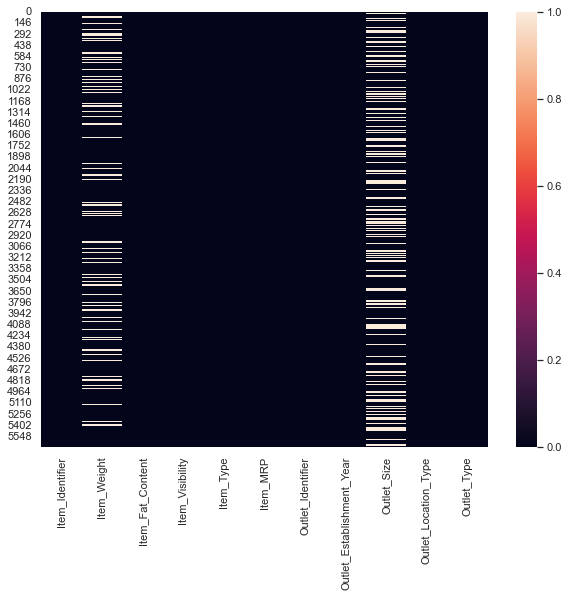

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(test_data.isnull())

In [72]:
test_data.value_counts('Outlet_Size')

Outlet_Size
Medium    1862
Small     1592
High       621
dtype: int64

In [73]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [74]:
test_data['Outlet_Size'].isnull().sum()

0

In [75]:
test_data.value_counts('Item_Weight')

Item_Weight
10.50    57
17.60    53
15.60    48
20.25    47
19.35    46
         ..
6.96      1
8.75      1
7.67      1
4.61      1
5.15      1
Length: 410, dtype: int64

In [76]:
np.mean(test_data['Item_Weight'])

12.695633368756374

In [77]:
np.median(test_data["Item_Weight"])

nan

In [78]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(np.mean(test_data['Item_Weight']))
                

In [79]:
np.median(test_data["Item_Weight"])

12.695633368756374

<AxesSubplot:>

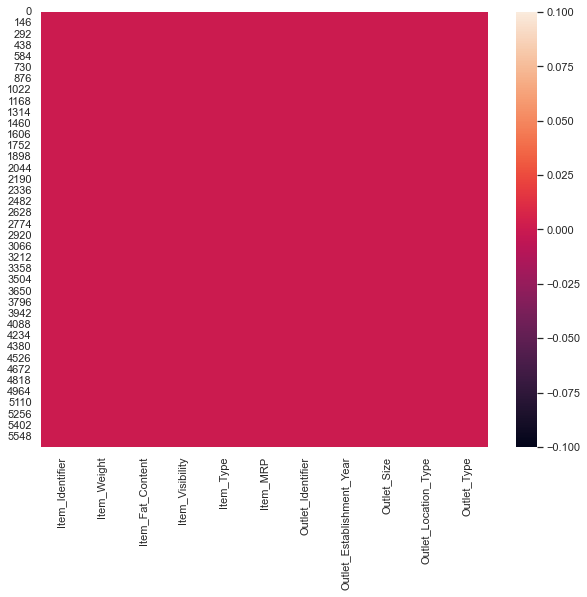

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(test_data.isnull())

NO NULL VALUES

In [81]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [82]:
test_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


<AxesSubplot:>

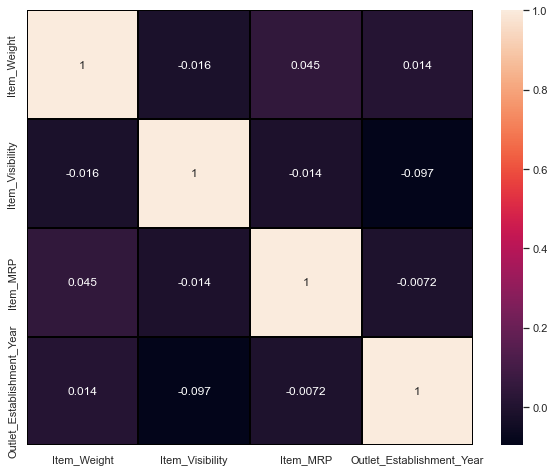

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(test_data.corr(),annot=True,linecolor='Black',linewidths=.2)

In [84]:
test_data.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
dtype: int64

TWO VARIABLES DEFINING SAME MEANING,SO REPLACING IT WITH SINGLE

In [85]:
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('LF','Low Fat')
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('low fat','Low Fat')
test_data["Item_Fat_Content"]=test_data["Item_Fat_Content"].replace('reg','Regular')
test_data.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    3668
Regular    2013
dtype: int64

# Label encoding

In [86]:
#Encoding the columns with the help of label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Item_Identifier'] = le.fit_transform(test_data['Item_Identifier'])
test_data['Item_Fat_Content'] = le.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size'] = le.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = le.fit_transform(test_data['Outlet_Type'])
test_data['Outlet_Identifier'] = le.fit_transform(test_data['Outlet_Identifier'])
test_data['Item_Type'] = le.fit_transform(test_data['Item_Type'])


In [87]:
test_data.value_counts('Item_Type')

Item_Type
13    789
6     781
9     638
5     570
4     454
0     438
3     435
8     338
10    311
14    281
1     165
7     148
15    121
11    111
2      76
12     25
dtype: int64

In [88]:
test_data.value_counts('Outlet_Size')

Outlet_Size
1    3468
2    1592
0     621
dtype: int64

In [89]:
test_data.value_counts('Outlet_Location_Type')

Outlet_Location_Type
2    2233
1    1856
0    1592
dtype: int64

In [90]:
test_data.value_counts('Outlet_Type')

Outlet_Type
1    3717
0     722
3     624
2     618
dtype: int64

In [91]:
test_data.value_counts('Outlet_Identifier')

Outlet_Identifier
5    624
1    621
6    620
8    620
9    620
7    619
3    618
2    617
0    370
4    352
dtype: int64

In [92]:
test_data.value_counts('Item_Identifier')

Item_Identifier
45      8
573     8
1242    8
680     8
1470    8
       ..
1266    1
447     1
214     1
873     1
473     1
Length: 1543, dtype: int64

# Checking Outliers

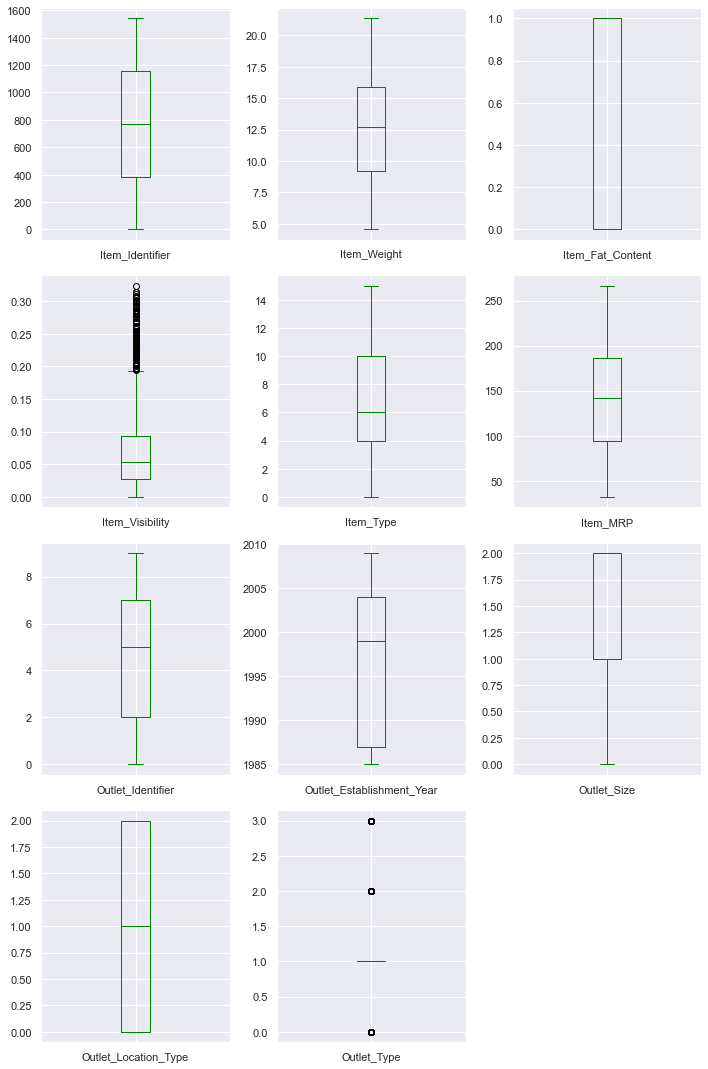

In [103]:

test_data.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS ARE PRESENT

# Removing Outliers

# Applying Z Score

In [94]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(test_data[['Item_Visibility']]))
new_df3=test_data[(z<3).all(axis=1)]
new_df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


# Percentage Loss

In [95]:
loss_percent=(5681-5600)/5600*100
print(loss_percent,'%')

1.4464285714285714 %


# Checking Skewness

In [97]:
new_df3.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.616007
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

In [98]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [99]:
new_df3[['Item_Visibility']] = scaler.fit_transform(new_df3[['Item_Visibility']].values)

In [100]:
new_df3.skew()

Item_Identifier             -0.001969
Item_Weight                  0.140901
Item_Fat_Content             0.616007
Item_Visibility              0.105676
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Identifier           -0.069734
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

In [101]:
new_df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,-1.453107,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,-0.440632,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.926222,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,-1.170062,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,1.229130,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,-1.236731,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,1.556046,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.427676,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,-1.746075,3,214.6218,2,2007,1,1,1


# Saving the Best Model

In [ ]:
metrics.r2_score(y_test, y_prediction)

In [124]:
import joblib

joblib.dump(mod1,'Bigmart_Sales.pkl')

['Bigmart_Sales.pkl']

In [125]:
import joblib
Load_Model=joblib.load("Bigmart_Sales.pkl")

In [126]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Load_Model.predict(x_test))
df_test= pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df_test

,Original,Predicted
0,3020.0688,2403.569625
1,459.4020,541.694930
2,2189.1504,1517.720032
3,718.3982,865.396328
4,1436.7964,824.445986
...,...,...
1830,1929.4884,1354.421257
1831,5175.9292,3642.286575
1832,1926.1594,2673.330634
1833,2277.0360,3940.096704
